# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million) - normal is 10/bil higher is smoggy   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!

In [7]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [8]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [9]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<IPython.core.display.Javascript object>


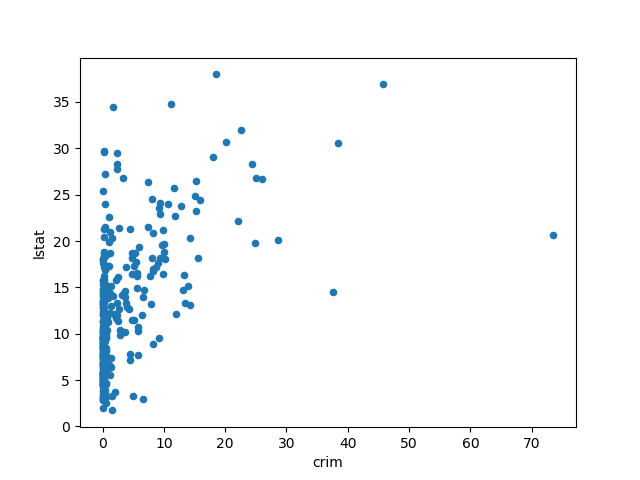

In [11]:
df.plot('crim', 'lstat', kind='scatter')

There are 191 low crime towns and 142 higher crime towns.
Low crime is defined as a per capita rate of 0.5 or below.
The percentage of low crime towns is 57.0%.


<IPython.core.display.Javascript object>


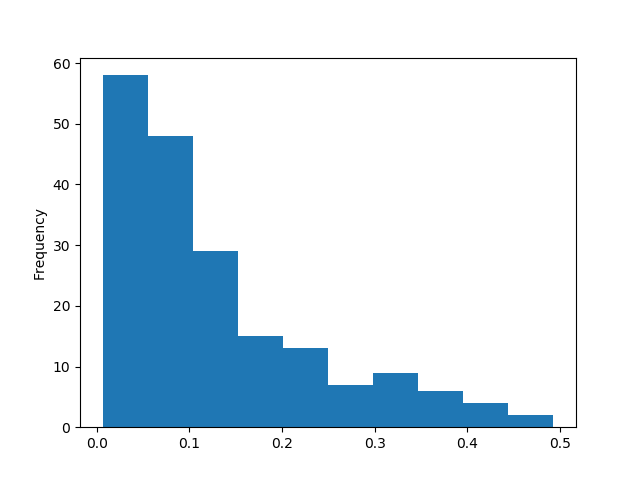

In [88]:
# there is one town with a lot!!!! of crime, some towns with "some" crime, but most look pretty low crime
# there also doesn't seem to be much of a correlation between low status and crime
low_crime_rate = 0.5
df_low_crime = df.loc[(df['crim'] <= low_crime_rate)]
print(f'There are {len(df_low_crime)} low crime towns and {len(df) - len(df_low_crime)} higher crime towns.')
print(f'Low crime is defined as a per capita rate of {low_crime_rate} or below.')
print(f'The percentage of low crime towns is {round(len(df_low_crime) / len(df) * 100, 0)}%.')
plt.figure()
df_low_crime['crim'].plot.hist()

In [82]:
df_low_crime_vs_lstat = df.loc[:, ['crim', 'lstat']]
df_low_crime_vs_lstat.corr()

,crim,lstat
crim,1.000000,0.532077
lstat,0.532077,1.000000


In [14]:
# let's do the same plot with the middle 50 of crime
df_crime_m50 = df.loc[(df['crim'] >= df['crim'].quantile(.25)) & (df['crim'] <= df['crim'].quantile(.75))]
df_crime_m50

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
325,493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
326,494,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
327,498,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3


<IPython.core.display.Javascript object>


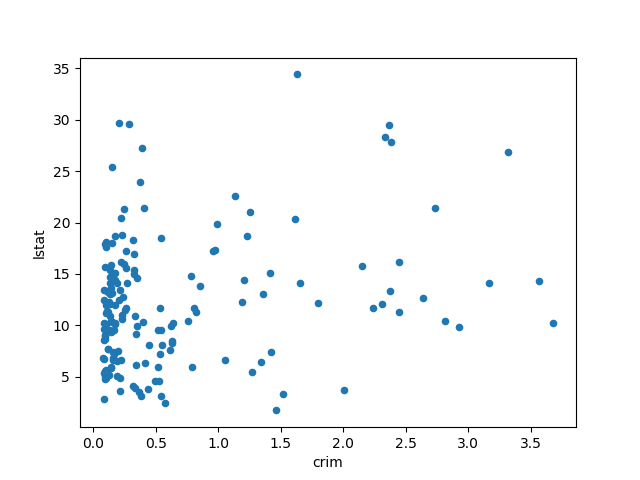

In [15]:
df_crime_m50.plot('crim', 'lstat', kind='scatter')

In [83]:
# using the middle 50, there still doesn't see to be a correlation in the data
df_crime_m50.loc[:, ['crim', 'lstat']].corr()

,crim,lstat
crim,1.000000,0.243926
lstat,0.243926,1.000000


In [ ]:
# there is even less correlation than with the full set of data

In [17]:
# instead use the middle 50 of lower status
df_lstat_m50 = df.loc[(df['lstat'] >= df['lstat'].quantile(.25)) & (df['lstat'] <= df['lstat'].quantile(.75))]
df_lstat_m50

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,498,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


<IPython.core.display.Javascript object>


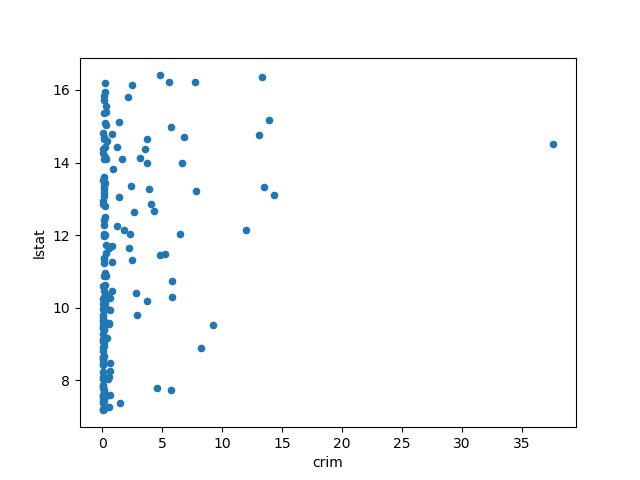

In [20]:
df_lstat_m50.plot('crim', 'lstat', kind='scatter')

In [84]:
# still no correlation
df_lstat_m50.loc[:, ['crim', 'lstat']].corr()

,crim,lstat
crim,1.000000,0.289427
lstat,0.289427,1.000000


In [22]:
# the charles river split
df_ch = df.loc[df['chas'] == 0]
df_ch

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [29]:
df_ch_no = df.loc[df['chas'] == 1]
df_ch_no

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
97,143,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
104,155,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
108,161,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
145,209,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
146,212,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
149,217,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
150,222,0.40771,0.0,6.20,1,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
151,223,0.62356,0.0,6.20,1,0.5070,6.879,77.7,3.2721,8,307,17.4,390.39,9.93,27.5
161,235,0.44791,0.0,6.20,1,0.5070,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0


<IPython.core.display.Javascript object>


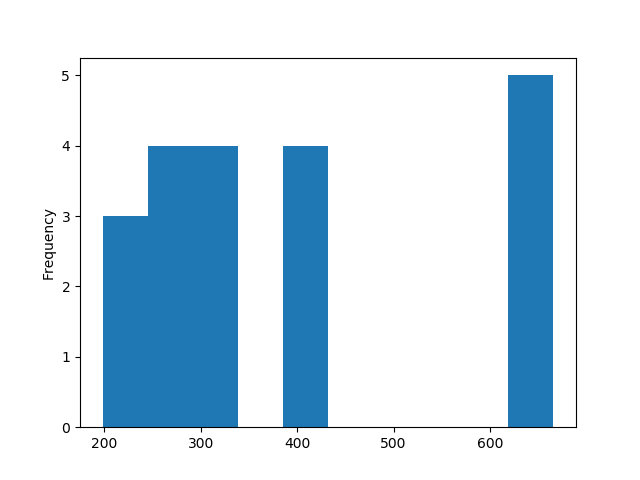

In [42]:
df_ch_no_taxes = df_ch_no['tax']
df_ch_no_taxes
plt.figure()
df_ch_no_taxes.plot.hist()

<IPython.core.display.Javascript object>


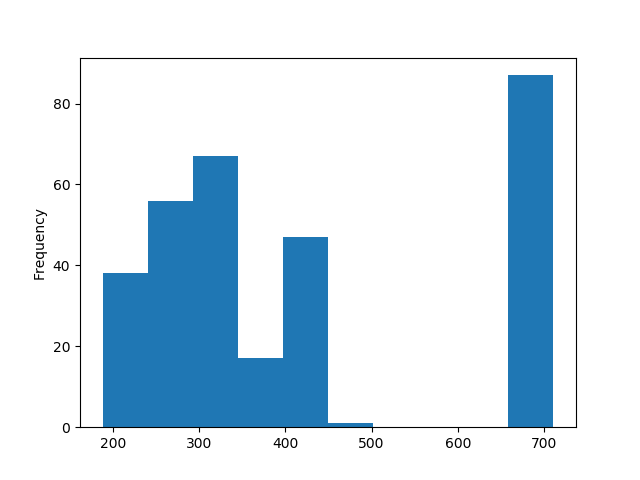

In [47]:
df_ch_taxes = df_ch['tax']
df_ch_taxes
plt.figure()
df_ch_taxes.plot.hist()

In [45]:
# the histograms of the tax column for the on charles river vs not are visually very similar, indicating a
# similar distribution

<IPython.core.display.Javascript object>


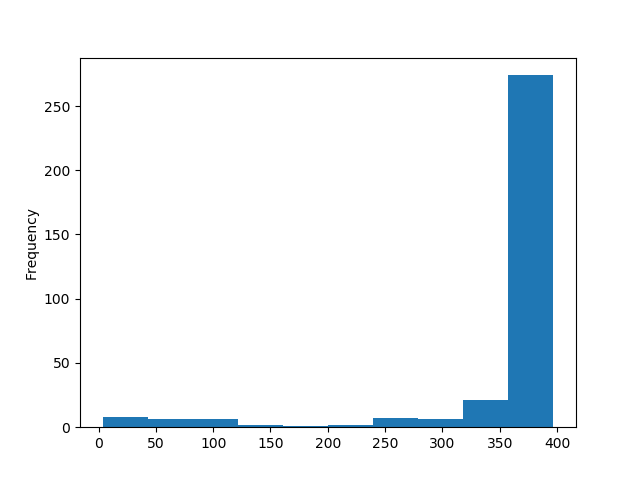

In [48]:
plt.figure()
df['b'].plot.hist()

<IPython.core.display.Javascript object>


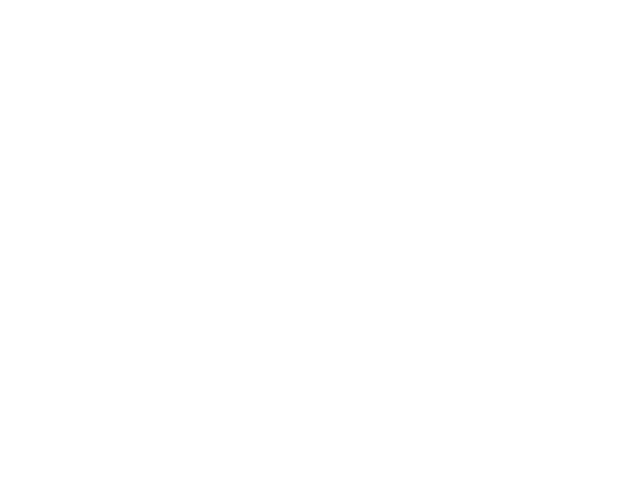

<IPython.core.display.Javascript object>


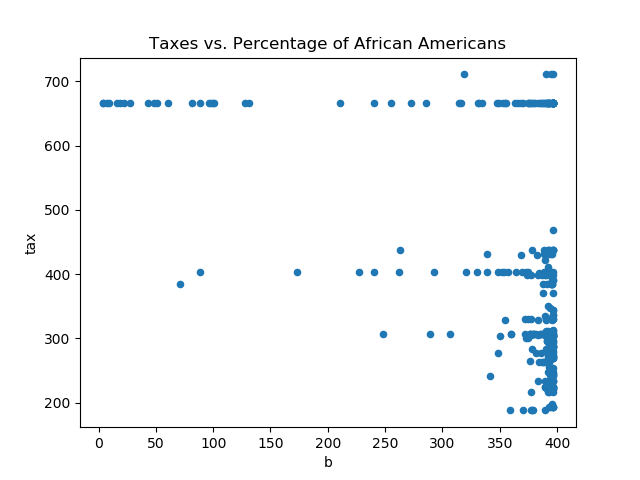

Text(0.5, 1.0, 'Taxes vs. Percentage of African Americans')

In [55]:
plt.figure()
df.plot('b', 'tax', kind='scatter')
plt.title('Taxes vs. Percentage of African Americans')

In [ ]:
# the tax rate doesn't see to correlate with % of African Americans, but outside the high tax rate towns
# the % of African Americans in each town tends to be consistently high

<IPython.core.display.Javascript object>


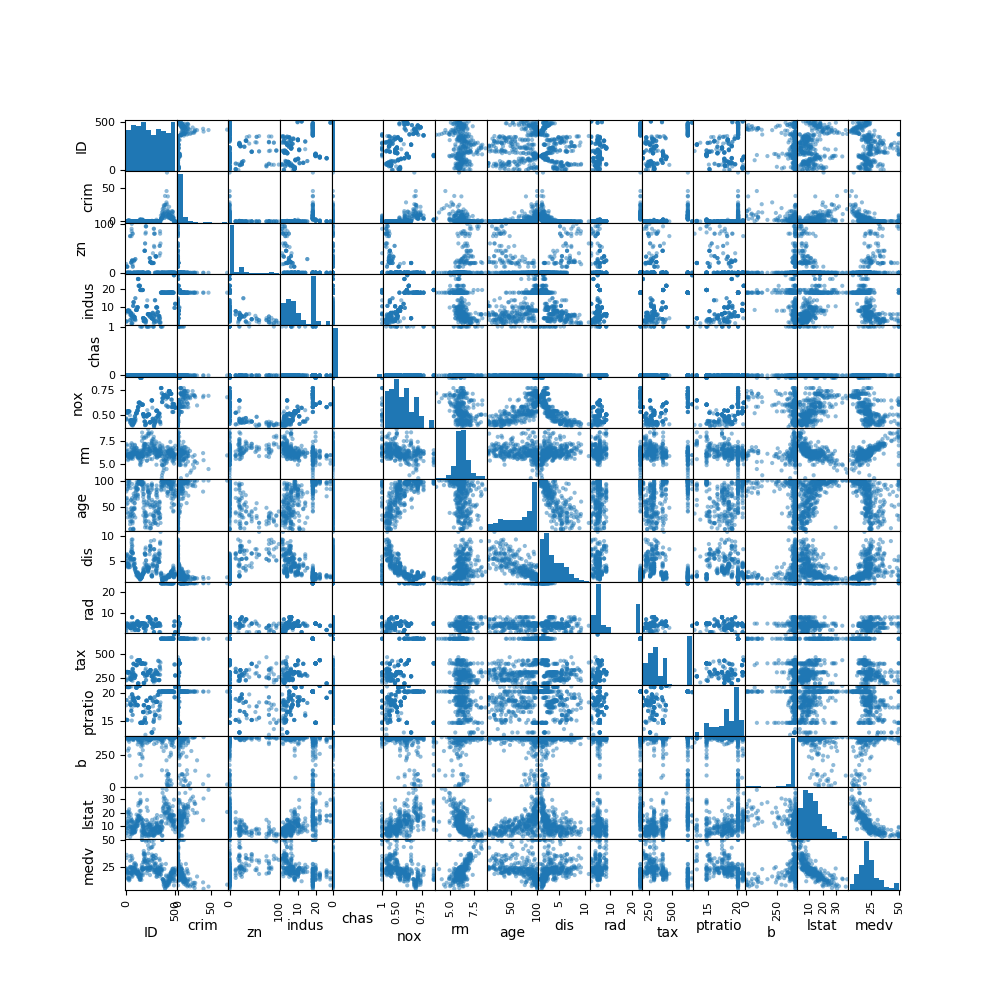

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1246f3278>,
      dtype=object)

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))

<IPython.core.display.Javascript object>


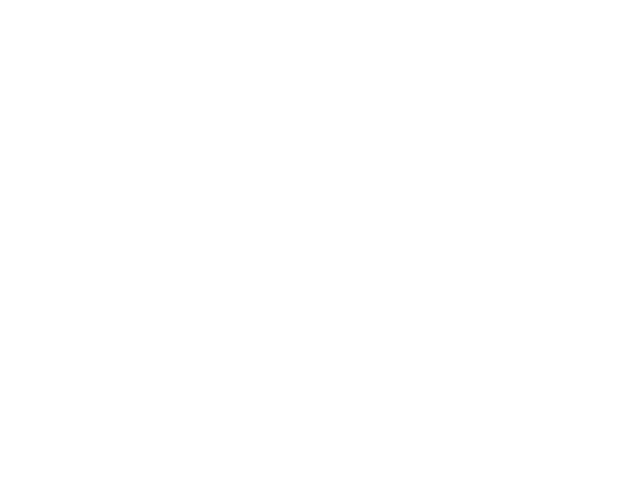

<IPython.core.display.Javascript object>


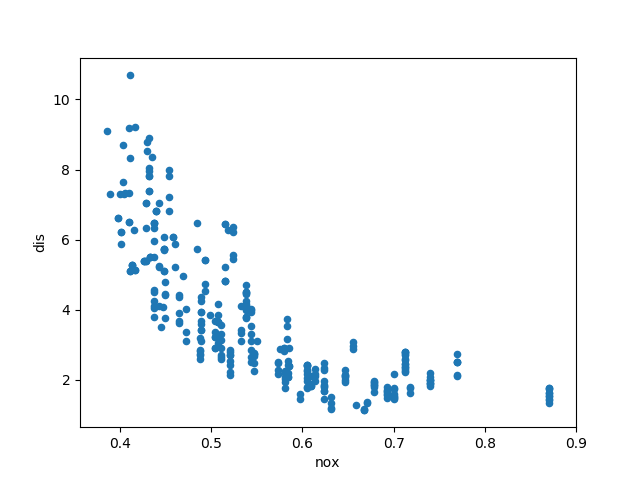

In [105]:
df_nox_dis = df.loc[:, ['nox', 'dis']]
df_nox_dis.head()
plt.figure()
df.plot.scatter('nox', 'dis')

          nox       dis
nox  1.000000 -0.769364
dis -0.769364  1.000000
              nox         dis
count  333.000000  333.000000
mean     0.557144    3.709934
std      0.114955    1.981123
min      0.385000    1.129600
25%      0.453000    2.122400
50%      0.538000    3.092300
75%      0.631000    5.116700
max      0.871000   10.710300


<IPython.core.display.Javascript object>


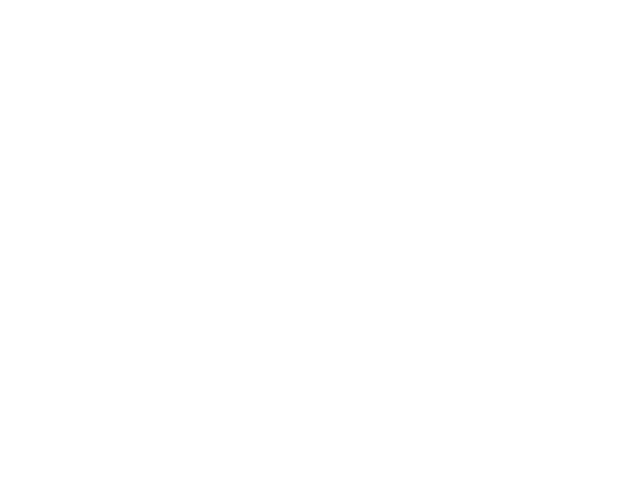

<IPython.core.display.Javascript object>


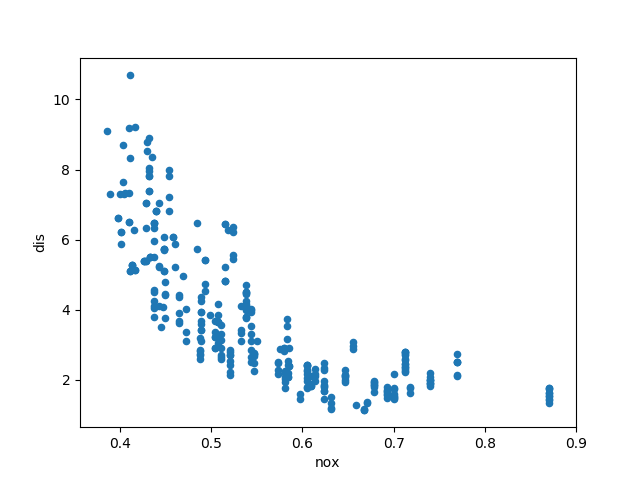

In [99]:
print(df_nox_dis.corr())
print(df_nox_dis.describe())
plt.figure()
df_nox_dis.plot.scatter('nox', 'dis')

In [106]:
# for middle 50 of nox and middle 50 of dis
df_nox_dis_mid50 = df_nox_dis.loc[(df_nox_dis['nox'] >= df_nox_dis['nox'].quantile(.25)) & 
                                 (df_nox_dis['nox'] <= df_nox_dis['nox'].quantile(.75)) ]
print(df_nox_dis_mid50.corr())
df_nox_dis_mid50.describe()

          nox       dis
nox  1.000000 -0.704552
dis -0.704552  1.000000


,nox,dis
count,173.000000,173.000000
mean,0.540723,3.341798
std,0.050123,1.366024
min,0.453000,1.169100
25%,0.504000,2.346000
50%,0.538000,3.092300
75%,0.583000,4.012300
max,0.631000,7.980900


<IPython.core.display.Javascript object>


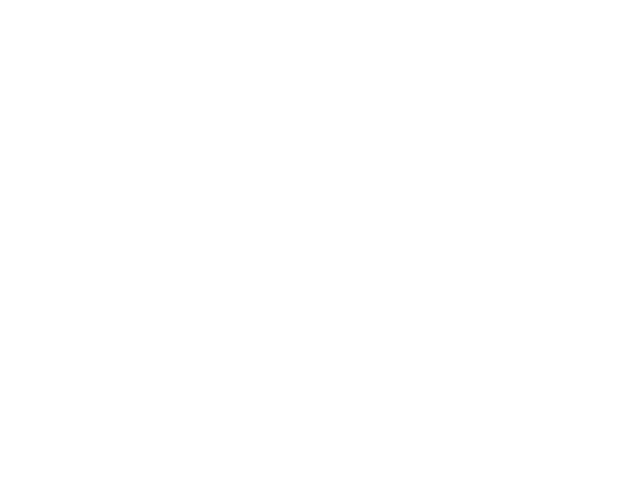

<IPython.core.display.Javascript object>


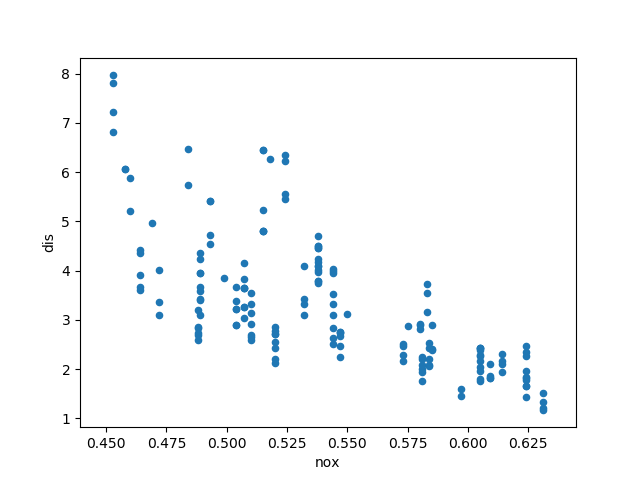

In [107]:
plt.figure()
df_nox_dis_mid50.plot.scatter('nox', 'dis')